# Day 13. Task 03
# Мультиклассовая классификация. One-hot encoding. Случайный лес

## 0. Импорты

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib import figure
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier


## 1. Препроцессинг

1. Прочитайте файл, расположенный в `datasets/checker_submits.csv`.
2. Создайте датафрейм `df` со столбцами: `uid`, `labname`, `numTrials`, `hour`, `dayofweek`, где `hour` и `dayofweek` (`0` – пн, `6` – вс) получены из `timestamp`. Вы будете пробовать прогнозировать день недели, основываясь на том, какой пользователь в какое время сделал какой по счету коммит какой лабораторной работы.
3. Используя `OneHotEncoder()` трансформируйте ваши категориальные признаки, удалив при этом изначальные столбцы.
4. Воспользуйтесь `StandardScaler()`, чтобы стандартизировать ваши численные признаки.
5. Сохраните этот датафрейм в файл `dayofweek.csv`.
6. Прежде чем пробовать обучать разные алгоритмы, посчитайте accuracy для наивного прогноза – такого, где все предсказания есть самый популярный класс.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('../content/drive/MyDrive/School21/day13/data/checker_submits.csv', parse_dates=['timestamp'])
df

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806


In [ ]:
df['hour'] = df.timestamp.dt.hour
df['dayofweek'] = df.timestamp.dt.dayofweek
df.drop(columns='timestamp', inplace=True)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [ ]:
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(df[['uid', 'labname']]).astype(int)
encoded

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]])

In [ ]:
encoder.categories_

[array(['user_0', 'user_1', 'user_10', 'user_11', 'user_12', 'user_13',
        'user_14', 'user_15', 'user_16', 'user_17', 'user_18', 'user_19',
        'user_2', 'user_20', 'user_21', 'user_22', 'user_23', 'user_24',
        'user_25', 'user_26', 'user_27', 'user_28', 'user_29', 'user_3',
        'user_30', 'user_31', 'user_4', 'user_6', 'user_7', 'user_8'],
       dtype=object),
 array(['code_rvw', 'lab02', 'lab03', 'lab03s', 'lab05s', 'laba04',
        'laba04s', 'laba05', 'laba06', 'laba06s', 'project1'], dtype=object)]

In [ ]:
new_columns = list(encoder.categories_[0]) + list(encoder.categories_[1])

In [ ]:
encoded = pd.DataFrame(encoded, columns = new_columns)
encoded

,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,...,lab02,lab03,lab03s,lab05s,laba04,laba04s,laba05,laba06,laba06s,project1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df = pd.concat(
    [df.drop(columns=['uid', 'labname']),
     encoded
     ],
     axis=1
)
df

,numTrials,hour,dayofweek,user_0,user_1,user_10,user_11,user_12,user_13,user_14,...,lab02,lab03,lab03s,lab05s,laba04,laba04s,laba05,laba06,laba06s,project1
0,1,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,6,20,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,7,20,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,8,20,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
scaler = StandardScaler() #стандартизируем численные признаки
df[['numTrials', 'hour']] = scaler.fit_transform(df[['numTrials', 'hour']])
df

,numTrials,hour,dayofweek,user_0,user_1,user_10,user_11,user_12,user_13,user_14,...,lab02,lab03,lab03s,lab05s,laba04,laba04s,laba05,laba06,laba06s,project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.to_csv('../content/drive/MyDrive/School21/day13/data/dayofweek.csv', index=False)

In [ ]:
most_popular = df.dayofweek.value_counts().index[0]
naive = np.full_like(df.dayofweek, most_popular)
naive

array([3, 3, 3, ..., 3, 3, 3])

In [ ]:
accuracy_score(df.dayofweek, naive)

0.23487544483985764

## 2. Алгоритмы

In [ ]:
X = df.drop(columns='dayofweek')
y = df.dayofweek
X

,numTrials,hour,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,...,lab02,lab03,lab03s,lab05s,laba04,laba04s,laba05,laba06,laba06s,project1
0,-0.788667,-2.562352,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### a. Логрегрессия

1. Обучите логистическую регрессию. Для baseline-модели используйте `random_state=21`, `fit_intercept=False`, `solver='liblinear'`.
2. Посчитайте accuracy.
3. Напишите функцию, которая нарисует график (`barh`) и выведет на нем n наиболее важных признаков, используя коэффициенты обученных моделей и названия признаков.
4. Воспользуйтесь функцией и нарисуйте для baseline-модели топ-10 наиболее важных признаков (абсолютные значения коэффициентов).
5. Помните, что вы работаете с мультиклассовой классификацией, и `coef_` вернет вам матрицу. Чтобы посчитать важность (importance) для конкретного признака вам нужно будет просуммировать отдельные коэффициенты для всех значений целевой переменной.

In [ ]:
lr_fit = LogisticRegression(C=1.0,
                            fit_intercept=False,
                            random_state=21,
                            solver='liblinear',
                            multi_class='auto',
                            max_iter=100).fit(X, y)

In [ ]:
lr_fit.score(X, y)

0.6215895610913404

In [ ]:
def feature_bars(model, n):
  coefs = pd.DataFrame(model.coef_, columns=model.feature_names_in_)\
      .abs()\
      .sum()\
      .sort_values(ascending=False)
  coefs[0:n].plot.barh()    

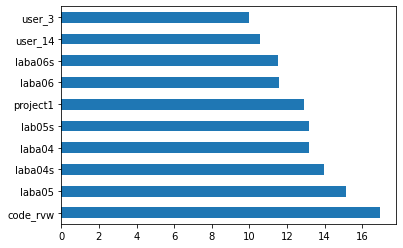

In [ ]:
feature_bars(lr_fit, 10)

### b. SVC

1. Обучите модель `SVC`. Для baseline-модели воспользуйтесь параметрами `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Попробуйте разные виды кернелов, посчитайте для них accuracy.
3. Нарисуйте график (`barh`) с топ-10 наиболее важными признаками (абсолютное значение коэффициентов) для baseline-модели с линейным кернелом.

По умолчанию, SVC использует “one vs one” стратегию классификации. Это означает, что `coef_` тоже вернет матрицу. Чтобы посчитать важность (importance) для конкретного признака вам нужно будет воспользоваться другой стратегией – [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) и просуммировать отдельные коэффициенты для всех значений целевой переменной.

In [ ]:
svc_fit = SVC(C=1.0, 
              kernel='linear',
              degree=3,
              gamma='scale',
              coef0=0.0,
              shrinking=True,
              probability=True,
              random_state=21).fit(X, y)
svc_fit.score(X, y)              

0.702846975088968

In [ ]:
svc_fit_sigmoid = SVC(C=1.0, 
              kernel='sigmoid',
              degree=3,
              gamma='scale',
              coef0=0.0,
              shrinking=True,
              probability=True,
              random_state=21).fit(X, y)
svc_fit_sigmoid.score(X, y)             

0.3997627520759193

In [ ]:
svc_fit_rbf = SVC(C=1.0, 
              kernel='rbf',
              degree=3,
              gamma='scale',
              coef0=0.0,
              shrinking=True,
              probability=True,
              random_state=21).fit(X, y)
svc_fit_rbf.score(X, y)             

0.8558718861209964

In [ ]:
svc_fit_1 = SVC(C=1.0, 
              kernel='linear',
              probability=True,
              random_state=21,
              decision_function_shape='ovr').fit(X, y)             

In [ ]:
pred_1 = svc_fit_1.predict(X)

In [ ]:
svc_fit_2 = SVC(C=1.0, 
              kernel='linear',
              probability=True,
              random_state=21,
              decision_function_shape='ovo').fit(X, y)     

In [ ]:
pred_2 = svc_fit_2.predict(X)

In [ ]:
estimator = SVC(C=1.0, 
              kernel='linear',
              probability=True,
              random_state=21)
svc_fit_3 = OneVsRestClassifier(estimator).fit(X, y)    

In [ ]:
pred_3 = svc_fit_3.predict(X)

In [ ]:
np.array_equal(pred_1, pred_2)

True

In [ ]:
np.array_equal(pred_1, pred_3)

False

In [ ]:
np.allclose(svc_fit_1.coef_, svc_fit_2.coef_)

True

In [ ]:
svc_fit_1.coef_.shape

(21, 43)

In [ ]:
len(svc_fit_3.estimators_)

7

In [ ]:
svc_fit_3.estimators_[0].coef_.shape

(1, 43)

In [ ]:
sum = np.zeros_like(svc_fit_3.estimators_[0].coef_)#создаем матрицу
for est in svc_fit_3.estimators_:
    sum += abs(est.coef_)
sum

array([[0.7317319 , 0.0459405 , 1.04611895, 2.8685459 , 4.42843791,
        4.87830341, 4.74813056, 4.56336572, 2.94936984, 2.82285163,
        2.81527581, 4.35394878, 2.80539862, 3.00830699, 6.00234115,
        2.99168328, 2.57842094, 4.29598823, 2.30110068, 4.3605157 ,
        3.22654894, 2.99219141, 2.81611781, 3.0989063 , 2.83858192,
        4.05433054, 2.84698578, 2.16331225, 3.87444406, 1.97990235,
        4.77484695, 2.96294366, 3.18140795, 1.04611895, 2.17650656,
        2.17556545, 3.90813184, 4.36827147, 3.79094101, 5.22487938,
        5.14037574, 5.10183608, 4.99975295]])

In [ ]:
coefs = pd.Series(sum[0], index=svc_fit_3.feature_names_in_)\
    .sort_values(ascending=False)
coefs

user_2       6.002341
laba05       5.224879
laba06       5.140376
laba06s      5.101836
project1     4.999753
user_11      4.878303
user_7       4.774847
user_12      4.748131
user_13      4.563366
user_10      4.428438
laba04       4.368271
user_24      4.360516
user_17      4.353949
user_22      4.295988
user_3       4.054331
lab05s       3.908132
user_4       3.874444
laba04s      3.790941
user_25      3.226549
code_rvw     3.181408
user_28      3.098906
user_19      3.008307
user_26      2.992191
user_20      2.991683
user_8       2.962944
user_14      2.949370
user_1       2.868546
user_30      2.846986
user_29      2.838582
user_15      2.822852
user_27      2.816118
user_16      2.815276
user_18      2.805399
user_21      2.578421
user_23      2.301101
lab03        2.176507
lab03s       2.175565
user_31      2.163312
user_6       1.979902
user_0       1.046119
lab02        1.046119
numTrials    0.731732
hour         0.045940
dtype: float64

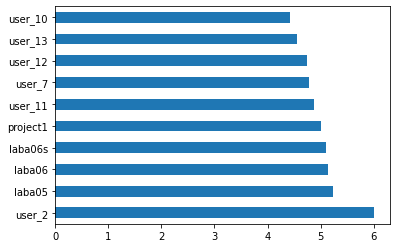

In [ ]:
coefs[0:10].plot.barh()

### c. Дерево классификаций

1. Обучите `DecisionTreeClassifier`. Для baseline-модели воспользуйтесь следующими параметрами: `max_depth=4`, `random_state=21`.
2. Попробуйте разные значения `max_depth`. Посчитайте accuracy для этих вариантов.
3. Нарисуйте график (barh) с топ-10 наиболее важными признаками (абсолютное значение коэффициентов) для baseline-модели.

In [ ]:
tree_fit_4 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=21
                                    ).fit(X, y)
tree_fit_4.score(X, y)                                   

0.5516014234875445

In [ ]:
tree_fit_10 = DecisionTreeClassifier(criterion='gini',
                                    max_depth=10,
                                    random_state=21
                                    ).fit(X, y)
tree_fit_10.score(X, y)        

0.8196915776986952

In [ ]:
tree_fit_None = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None,
                                    random_state=21
                                    ).fit(X, y)
tree_fit_None.score(X, y)        

1.0

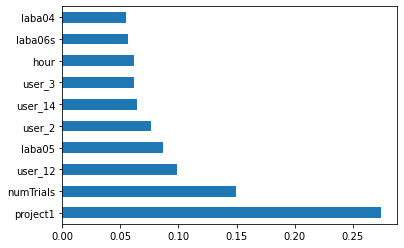

In [ ]:
features = pd.Series(tree_fit_4.feature_importances_, index=tree_fit_4.feature_names_in_)\
    .sort_values(ascending=False)
features[0:10].plot.barh()    

### d. Случайный лес

В реальной жизни леса состоят из деревьев. То же самое, как вы знаете, работает и в машинном обучении. Случайный лес – это множество отдельных деревьев классификации.

1. Обучите `RandomForestClassifier`. Для baseline-модели воспользуйтесь следующими параметрами: `n_estimators=100`, `max_depth = 25`, `random_state=21`.
2. Попробуйте разные значения `max_depth` и `n_estimators`. Посчитайте accuracy для этих вариантов.
3. Нарисуйте график (barh) с топ-10 наиболее важными признаками (абсолютное значение коэффициентов) для baseline-модели.

In [ ]:
forest = RandomForestClassifier(n_estimators=100,
                                max_depth=25,
                                random_state=21).fit(X, y)
forest.score(X, y)                                

1.0

In [ ]:
for  max_depth in [5, 10, 25, 100]:
  for n_estimators in [10, 50, 100]:
    forest = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                random_state=21).fit(X, y)
    print('Max depth: {}, N estimators: {}, accuracy: {}'.format(max_depth,
                                                                 n_estimators,
                                                                 forest.score(X, y)))                            

Max depth: 5, N estimators: 10, accuracy: 0.603202846975089
Max depth: 5, N estimators: 50, accuracy: 0.5848161328588375
Max depth: 5, N estimators: 100, accuracy: 0.5794780545670225
Max depth: 10, N estimators: 10, accuracy: 0.8285883748517201
Max depth: 10, N estimators: 50, accuracy: 0.8701067615658363
Max depth: 10, N estimators: 100, accuracy: 0.8855278766310795
Max depth: 25, N estimators: 10, accuracy: 0.9958481613285883
Max depth: 25, N estimators: 50, accuracy: 1.0
Max depth: 25, N estimators: 100, accuracy: 1.0
Max depth: 100, N estimators: 10, accuracy: 0.9976275207591934
Max depth: 100, N estimators: 50, accuracy: 1.0
Max depth: 100, N estimators: 100, accuracy: 1.0


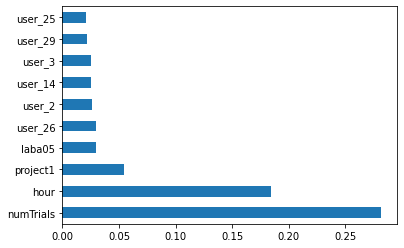

In [ ]:
features = pd.Series(forest.feature_importances_, index=forest.feature_names_in_)\
    .sort_values(ascending=False)
features[0:10].plot.barh()    